<br />

<div style="text-align: center;">
<font size="7">数値計算試験問題</font>
</div>
<br />
<div style="text-align: right;">
<font size="4">2022/12/23 実施</font>
<br />
<font size="4">cc by Shigeto R. Nishitani 2022 </font>
</div>



# 1 簡単な行列計算(25点)

関数
$$
f(x) = \frac{4}{1+x^2}
$$
を多項式
$$
F(x) = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + a_4 x^4
$$
で補間することを試みる．
与関数のx=[0, 0.25, 0.5, 0.75, 1.0]
での値から直接逆行列から多項式補間する手法を試す．
連立方程式の係数行列$\mathbf{A}$(ヴァンデルモンド行列と呼ばれる)およびデータベクトル$\mathbf{y}$は
```
A = [[1.         0.         0.         0.         0.        ]
 [1.         0.25       0.0625     0.015625   0.00390625]
 [1.         0.5        0.25       0.125      0.0625    ]
 [1.         0.75       0.5625     0.421875   0.31640625]
 [1.         1.         1.         1.         1.        ]]
y = [4.         3.76470588 3.2        2.56       2.        ]
```
となる．ヴァンデルモンド行列$\mathbf{A}$の逆行列をデータベクトル$\mathbf{y}$に掛けることで，
係数の値を求めよ．

以下は$\mathbf{A}$，$\mathbf{y}$を求めるコードと，与関数，補間関数のプロットである．
```python
import scipy.linalg as linalg   # SciPy Linear Algebra Library
import numpy as np

nn = 5 # x_i number

def func(x):
    return 4.0/(1+x**2)
xx = []
yy = []
for x in np.linspace(0,1,nn,endpoint=True):
    xx.append(x)
    yy.append(func(x))

print(xx)
print(yy)

a_matrix = []
y_vector = []
for i in range(nn):
    for j in range(nn):
        a_matrix.append(xx[i]**j)
    y_vector.append(yy[i])
        
A = np.array(a_matrix).reshape(nn,nn)
y = np.array(y_vector)
print(A)
print(y)

inv_A = linalg.inv(A)
print(np.dot(inv_A,y))
```

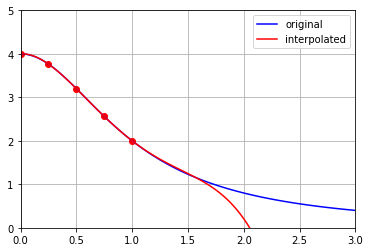

# 2 誤差・精度(25点)

最初に紛れ込んだ丸め誤差が次第に拡大されて，最後には真の値と全く違う値となる
「不安定な」例として「Numeriacl Recipes in C」で紹介されている漸化式の誤差を検討する．

次のような，いわゆる黄金比
$$
\phi = \frac{\sqrt{5} - 1}{2} = 0.61803399
$$
の累乗計算を考える．素直に累乗(power)で求めた場合と，
\begin{align}
\phi^{n+1} &= \phi^{n-1} - \phi^n \\
\phi^0 &= 1.0 \\
\phi^1 &= 0.61803398
\end{align}
という漸化式(recurrence formula)で求めた場合とで，数値を%20.15fで出力して，
それらの誤差をn=30程度までで議論せよ．

以下は，それぞれのリスト(phi_power, phi_recur)を片対数でプロットした結果である．

「Numeriacl Recipes in C, C言語による数値計算のレシピ」, W.H.Press他(技術評論社, 1993), p.44.

``` python
import matplotlib.pyplot as plt

phi1 = 0.61803399
phi_recur = [1]
phi_recur.append(phi1)
phi_power = [1]
phi_power.append(phi1)
step = [0, 1]

for i in range(2,31):
    # ...
    #ここを考える
    # ...

plt.plot(step, phi_power, color = 'r', label="power")
plt.plot(step, phi_recur, color = 'b', label="recur")
plt.legend()
plt.xlabel('step')
plt.ylabel('phi^n')
plt.yscale('log')
plt.grid()
plt.show()
```

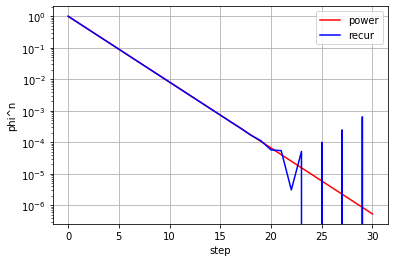

# 3 数値積分，解，収束性(25点)

数値積分に際して，関数値の計算にコストがかかる場合，限られた点での値から高精度で計算するNewton-Cotesの公式を使う．
4区間5点の閉区間(closed)公式(Boole's formula)は次のとおりである．
\begin{align}
h = & \frac{b-a}{4} \\
\int_a^b f(x) dx = & \frac{2}{45}h\left\{7f(a)+32f(a+h)+12f(a+2h)\right. \\
& \left. +32f(a+3h)+7f(a+4h)\right\}
\end{align}

これに従って求めた
\begin{align}
\int_0^1 \frac{4}{1+x^2} dx & \,(= \pi)
\end{align}
の値は以下の通りである．

数値積分の中点則を用いて求めた場合，同じ程度の精度を達成するには何点が必要となるか．
``` python
import numpy as np
def func(x):
    return 4.0/(1+x**2)

n = 4    
h = 1.0/n

boole = 2/45*h*(7*func(0)+32*func(h)+12*func(2*h)+32*func(3*h)+7*func(4*h))
print("%26s : %15.10f" % ("from Boole's formula",boole) )
print("%26s : %15.10f" % ("actual Error", boole-np.pi))
print("%26s : %15.10f" % ("Estimated Error f^(6)(0.5)", h**7*8/945*1311.8)) # 1311.8=$f^6(0.5)$
```

```
      from Boole's formula :    3.1421176471
              actual Error :    0.0005249935
Estimated Error f^(6)(0.5) :    0.0006778067
```

ちなみに問１で求めた補間多項式を積分した値は，3.142183333となりBoole公式で求めた値と大体一致する．

# 4 微分方程式 (25点)


Verlet法による小惑星軌道のシミュレーションを次のような条件で行った．
```python
def force(pos):
    x=pos[0]
    y=pos[1]
    L=(x*x+y*y)**(3/2)
    return [-x/L,-y/L]

def Verlet(r0,rh):
    f=force(r0)
    x=2*r0[0]-rh[0]+h**2/m*f[0]
    y=2*r0[1]-rh[1]+h**2/m*f[1]
    return [x,y]

h=0.1
dx, dy=0.0, h
m=0.2
xx=[3.0, 3.0-dx]
yy =[0.0,-dy]
```

1. この小惑星軌道をplotせよ．
1. この小惑星の公転周期が規格化した単位でいかほどになるか答えよ．
1. 異なる初期条件を使って軌跡を表示し，その飛翔体の振る舞いを解説せよ．
